#  1/ Objectives

Build a predictive model that predicts the prospects of future and present employee (this means whether the employee leaves the company in the next 2 years)
Calculate Principal Component Analysis using NumPy and Scikit-Learn
See the impact of Principal Component Analysis
Data
The data that I use in this notebook is Employee Future Prediction

A company's HR

This data contains some variables, which are as follows:

Education: Education level
Joining year: Year of Joining Company
City: City office where posted
Payment Tier:
Highest
Mid Level
Lowest
Age: The employe's age
Gender: Gender of employee
EverBenched: Ever kept out of projects for 1 month or more
ExperienceInCurrentField: Experience in current field
LeaveOrNot: Whether employee leaves the company in the next 2 years

#  2/ Import Libraries

In [1]:
#used for importing data
import pandas as pd
#using for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
#used to transform data to numeric format
from sklearn.preprocessing import LabelEncoder
#algorithm used to train the model
from sklearn.tree import DecisionTreeClassifier
#used to test the model accuracy
from sklearn.metrics import accuracy_score
#used to save & load the model 
import pickle

#  3/ Import the Dataset 

In [2]:
data = pd.read_csv("Employee.csv").drop('City',axis=1).drop('JoiningYear',axis=1)

In [3]:
data 

,Education,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,3,34,Male,No,0,0
1,Bachelors,1,28,Female,No,3,1
2,Bachelors,3,38,Female,No,2,0
3,Masters,3,27,Male,No,5,1
4,Masters,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...
4648,Bachelors,3,26,Female,No,4,0
4649,Masters,2,37,Male,No,2,1
4650,Masters,3,27,Male,No,5,1
4651,Bachelors,3,30,Male,Yes,2,0


#  4/ Data Preprocessing

In [4]:
data.shape

(4653, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   PaymentTier                4653 non-null   int64 
 2   Age                        4653 non-null   int64 
 3   Gender                     4653 non-null   object
 4   EverBenched                4653 non-null   object
 5   ExperienceInCurrentDomain  4653 non-null   int64 
 6   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 254.6+ KB


In [6]:
# check if data is null 
data.isnull().sum()

Education                    0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
#check unique values in each column
print("Education : " , data['Education'].unique())
print("PaymentTier : " , data['PaymentTier'].unique())
print("Age : " , data['Age'].unique())
print("Gender : " , data['Gender'].unique())
print("EverBenched  : " , data['EverBenched'].unique())
print("ExperienceInCurrentDomain : " , data['ExperienceInCurrentDomain'].unique())
print("LeaveOrNot : " , data['LeaveOrNot'].unique())

Education :  ['Bachelors' 'Masters' 'PHD']
PaymentTier :  [3 1 2]
Age :  [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender :  ['Male' 'Female']
EverBenched  :  ['No' 'Yes']
ExperienceInCurrentDomain :  [0 3 2 5 1 4 7 6]
LeaveOrNot :  [0 1]


# 5/ Data Visualization


#### Leaving Employee Per Paymenet Tier

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

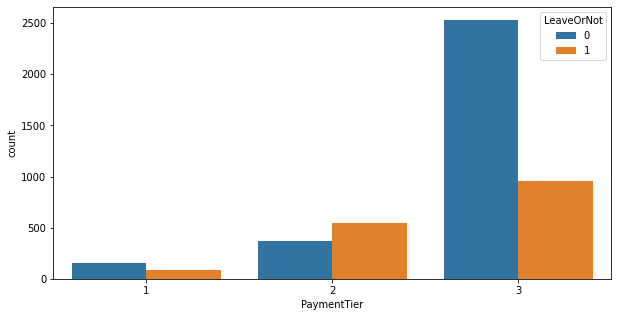

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='PaymentTier',hue='LeaveOrNot')

#### Leaving Employee Per Age

<AxesSubplot:xlabel='Age', ylabel='count'>

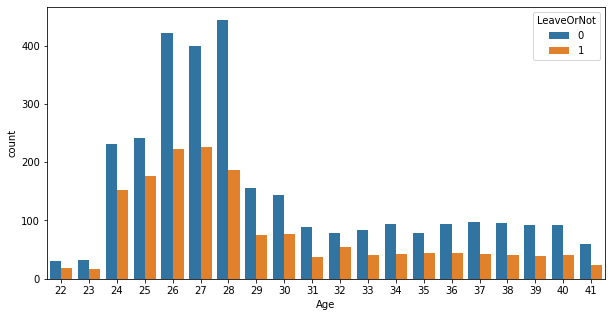

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Age',hue='LeaveOrNot')

#### Leaving Employee Per Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

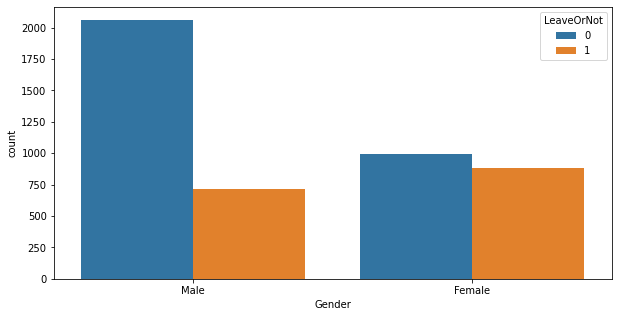

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Gender',hue='LeaveOrNot')

#### Leaving Employee Per Experience Year

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

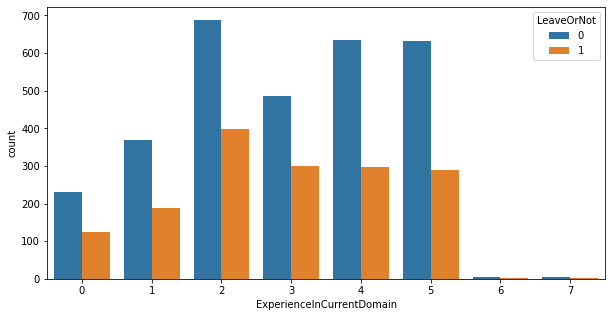

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='ExperienceInCurrentDomain',hue='LeaveOrNot',)

# 6/ Model Training

#### Scale Data To Numercial Format 
there's 3 unique values in Education feature & 2 for gender & 2 for EverBenched. we will use label encoder, because there is hierarchy or order in this features. The transformation of the values in this feature will be 0 for 'Bachelors', 1 for 'Masters', and 2 for 'PHD'. 0 for 'Female', 1 for 'Male' . 0 for 'No' 1 for 'yes'

In [12]:
# scale data to numeric format
le_education = LabelEncoder()
le_gender = LabelEncoder()
le_ever_benched = LabelEncoder()
data['Education']=le_education.fit_transform(data['Education'])
data['Gender']=le_gender.fit_transform(data['Gender'])
data['EverBenched']=le_ever_benched.fit_transform(data['EverBenched'])


In [13]:
data

,Education,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,3,34,1,0,0,0
1,0,1,28,0,0,3,1
2,0,3,38,0,0,2,0
3,1,3,27,1,0,5,1
4,1,3,24,1,1,2,1
...,...,...,...,...,...,...,...
4648,0,3,26,0,0,4,0
4649,1,2,37,1,0,2,1
4650,1,3,27,1,0,5,1
4651,0,3,30,1,1,2,0


#### Split Train & Test Data 
we will use 80% for training & 20% for testing the model accuracy 

In [14]:
x = data[['Education','PaymentTier','Age','Gender','EverBenched','ExperienceInCurrentDomain']]
y= data['LeaveOrNot']

In [15]:
x_train = data.iloc[:3700,:6]
y_train = data.iloc[:3700,6:7]
x_test = data.iloc[3700:,:6]
y_test = data.iloc[3700:,6:7]
print('train_data lenght:{}\ntest_data lenght:{}'.format(len(x_train),len(y_test)))


train_data lenght:3700
test_data lenght:953


#### Train The Model

In [16]:
classifier = DecisionTreeClassifier(max_leaf_nodes=10)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

#### Test Prediction

In [17]:
predictions = classifier.predict(x_test)
print('The predicted values:{}\n Y_test = {}'.format(predictions[:15],y_test[:15]))

The predicted values:[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 Y_test =       LeaveOrNot
3700           0
3701           1
3702           1
3703           0
3704           1
3705           0
3706           0
3707           1
3708           0
3709           0
3710           0
3711           1
3712           1
3713           1
3714           0


#### Model Accuracy

In [18]:
accuracy_score(y_true=y_test,y_pred=predictions)

0.7523609653725079

# 7/ Save The Model

In [19]:
data_save = {"model":classifier,"le_education":le_education,"le_gender":le_gender,"le_ever_benched":le_ever_benched}
with open('emp_model.pkl','wb') as file :
    pickle.dump(data_save,file)

# 8/ Open The Model

In [20]:
with open('emp_model.pkl','rb') as file :
    data = pickle.load(file)
classifier_loaded = data["model"]
le_education_loaded = data["le_education"]
le_gender_loaded = data["le_gender"]
le_ever_benched_loaded = data["le_ever_benched"]

In [21]:
#test the loaded model
new_x=[[0,3,34,1,0,0]]
classifier_loaded.predict(new_x)

C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)